CREDIT CARD FRAUD DETECTION WITH SVM AND DECISON TREES

In [41]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

LOAD THE DATA SET

In [39]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../data/creditcard.csv')
#print the firts 5 rows of the dataframe
df.head(5)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


dataset analyiss

([<matplotlib.axis.XTick at 0x2115b4c5090>,
 [Text(0, 0, 'normal (0)'), Text(1, 0, 'fraud(1)')])

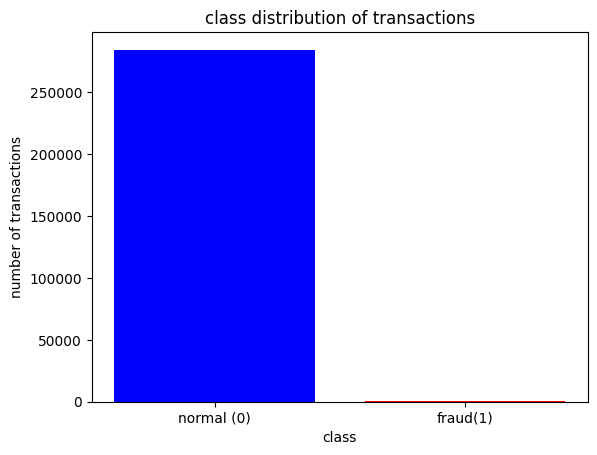

In [36]:
# get the set of distinct classes
labels = df.Class.unique()

# get the count of each class
sizes = df.Class.value_counts().values


#plot the class distribution usiing bar chart
plt.Figure(figsize=(6,6))
plt.bar(labels,sizes ,color=['blue','red'])
plt.title('class distribution of transactions')
plt.xlabel("class")
plt.ylabel('number of transactions')
plt.xticks(labels,['normal (0)','fraud(1)'])

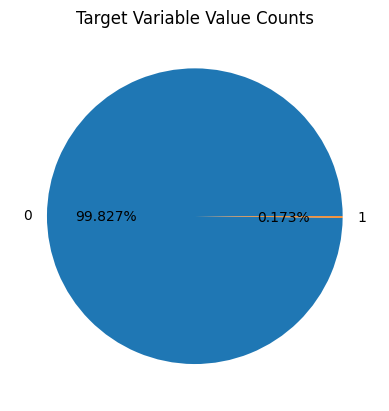

In [35]:
#PLOTING THE CLASS DISTRIBUTION USING PIE CHART

#create a pie chart
# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

FRUAD VS AMOUNT

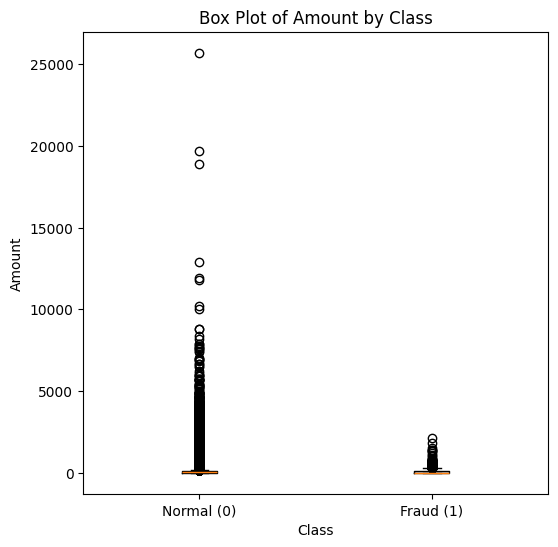

In [67]:
#ploting using box plot

#Split the data into two classes
normal = df[df['Class'] == 0]['Amount']
fraud = df[df['Class'] == 1]['Amount']

plt.figure(figsize=(6, 6))
box = plt.boxplot([normal, fraud], 
                  labels=['Normal (0)', 'Fraud (1)'], 
)
plt.title('Box Plot of Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()


VISUALIZE THE EFFECT OF DIFFRENT MATRIX USING CORRELATION MATRIX

<Axes: >

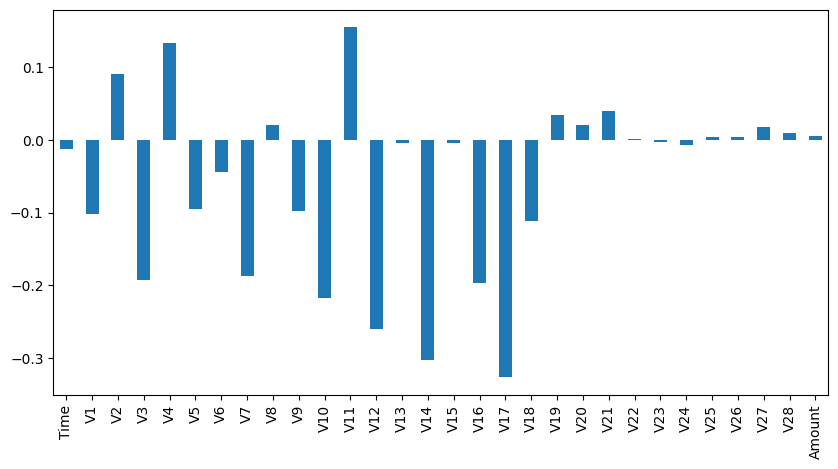

In [69]:
#this plot shows wich featues are more strongly positively or negtatively correlated with target variable
#calculate the correlation matrix
corr_v = df.corr()["Class"].drop("Class")
corr_v.plot(kind='bar',figsize=(10,5))
